# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 11

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


**Баллы за задание:**

* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 60 баллов
* Задача 4 &mdash; 50 баллов
* Задача 5 &mdash; 50 баллов





-----

In [3]:
import scipy.stats as sps
import numpy as np
import pandas as pd
from tqdm import tqdm
from datetime import datetime, timedelta
from IPython.display import Image
from statsmodels.stats.proportion import proportion_confint

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

In [2]:
# Bot check

# HW_ID: phds_hw8
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

---
### Задача 1
#### **Профиль физика**

Рассмотрим [данные](https://drive.google.com/file/d/1qGNN9pcSg6safgxqvWeimQEPtlyggOYc/view?usp=share_link) из первой задачи прошлого домашнего задания, нам понадобится только поперечный импульс `pT` мюона $\pi^+$ (`id = 211`). В предположении, что дисперсия значений не зависит от типа мюона, посчитайте с помощью формулы `MDE`, сколько мюонов каждого из двух исследуемых типов надо измерить, чтобы задетектировать разницу в средних импульсах равной 0.02? Можно ли снизить это число и из каких соображений? Сделайте соотвветсвующие вычисления

Выгрузим данные.

In [3]:
df = pd.read_csv('pi.csv')
df.head()

,id,pT,xF,E
0,211,0.996910,1.861209,16.103207
1,211,0.837641,9.728960,84.014754
2,-211,0.540523,0.173407,1.598068
3,-211,0.746933,0.708969,6.168992
4,-211,0.272212,0.431071,3.734888


Выделим нужные нам.

In [4]:
pT_plus = df['pT']

Посмотрим на гистограмму.

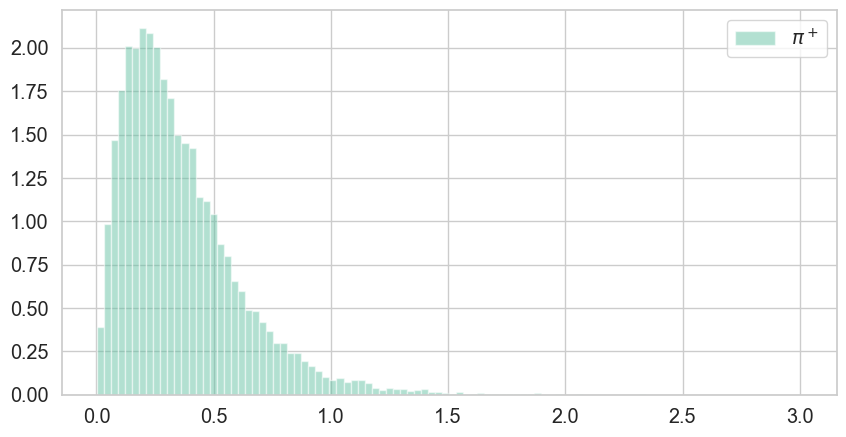

In [5]:
plt.figure(figsize=(10, 5))

plt.hist(pT_plus, alpha=0.5, bins=100, density=True, label='$\pi^+$')

plt.legend()
plt.show()

По формуле для `MDE` вычислите необходимый размер выборки.

In [25]:
alpha = 0.05  # уровень значимости
beta = 0.8  # мощности
eps = 0.02  # размер эффекта

# сумма квантилей
q = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)

In [7]:
var_0 = pT_plus.var()
n_0 = np.ceil((q ** 2) * (var_0 + var_0) / (eps * eps)).astype(int)

n_0, var_0

(2059, 0.0665891491273772)

In [8]:
pT_plus.describe()

count    20000.000000
mean         0.362518
std          0.258049
min          0.002288
25%          0.178141
50%          0.302974
75%          0.482752
max          3.007426
Name: pT, dtype: float64

Обрежем выбросы, чтобы уменьшить дисперсию

**Внимание! Удалять выбросы можно только на основе данных до эксперимента. Например, не рассматривать в эксперименте пользователя, на котором произошел выброс. Удаление пользователей по выбросам по экспериментальным данных может привести к большим ошибкам.**

In [9]:
pT_plus = pT_plus[pT_plus < 1.5]

In [10]:
var_0 = pT_plus.var()
n_0 = np.ceil((q ** 2) * (var_0 + var_0) / (eps * eps)).astype(int)

n_0, var_0

(1846, 0.05969393602336547)

Посмотрим на зависимость размера выборки в исследовании от размера эффекта. Какой минимальный эффект можно зафиксировать с нашей выборкой?

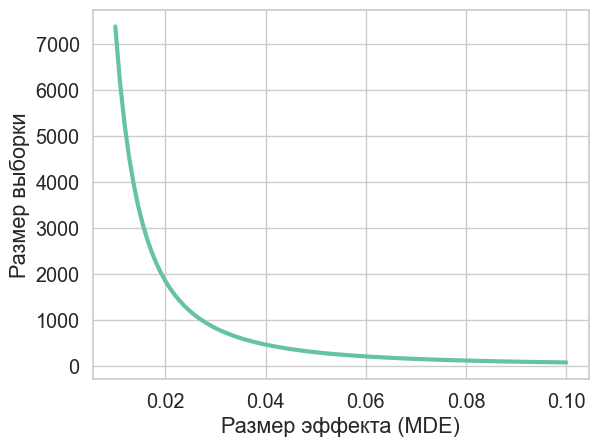

In [11]:
eps = np.linspace(0.01, 0.1, 100)
n = np.ceil((q ** 2) * (var_0 + var_0) / (eps * eps)).astype(int)

plt.plot(eps, n, lw=3)
plt.xlabel('Размер эффекта (MDE)')
plt.ylabel('Размер выборки');

In [23]:
q_sum = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
effect = q_sum / np.sqrt(pT_plus.values.shape[0]) * np.sqrt(var_0 + var_0) 
print('минимальный эффект, который можно задетектировать с данной выборкой: ', effect)

минимальный эффект, который можно задетектировать с данной выборкой:  0.006085089236259568


In [24]:
pT_plus.mean()

0.3577552294598086

**Вывод**

Чем меньше размер выборки, там больше MDE

---
### Задача 2

Выведите формулу `MDE` для относительного t-теста.

:(

---
### Задача 3
#### **Профиль физика**


Квантовые компьтеры состоят из кубитов, каждый из которых по-отдельности можно представить в виде единичного вектора на сфере. Считывание состояние кубита — это получение проекции этого вектора на ось $z$, причём считав состояние один раз мы получаем детерменированное значение: 0 или 1. Таким образом для получения значения проекции с определённой точностью мы усредняем некоторое количество считываний.

В данной задаче мы будем генерировать выборку из распределения Бернулли, симулируя проекции, получаемые от кубита. Наша задача — исследовать минимальный размер выборки для разных значений разделения состояний.


Выберите или оцените каким-нибудь способом:

1. Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

2. Размеры A и B групп;

3. Желаемый минимальный детектируемый эффект;

4. Мощность критерия.

Обоснуйте свой выбор в каждом из пунктов.


> Статистический критерий (название / односторонний или двусторонний / связные или независимые выборки);

**Ответ:**

абсолютный ttest односторонний, независимые выборки 


> Мощность критерия

**Ответ:** $\beta = 0.8$

> Желаемый минимальный детектируемый эффект;

> Размер А и В групп;

Будем подбирать по таблице `MDE`-мощность-размер выборки

In [26]:
def get_mde(alpha, beta, sample_size, var_R, two_sided=False):
    '''Расчитывает MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param sample_size: размер выборок
    :param var_R: оценка дисперсии выборок
    :param two_sided: двусторонний ли критерий
    :returns: теоретический MDE
    '''

    a = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return a / np.sqrt(sample_size) * np.sqrt(var_R + var_R)


def get_sample_size(alpha, beta, mde, var_R, two_sided=False):
    '''Расчитывает размер выборки для детектирование MDE

    :param alpha: желаемая ошибка первого рода
    :param beta: желаемая мощность
    :param mde: необходимый эффект
    :param var_R: дисперсии выборок
    :returns: необходимый размер выборки
    '''

    a = sps.norm.ppf(1 - alpha) + sps.norm.ppf(beta)
    return np.ceil((a ** 2) * (var_R + var_R) / (mde * mde)).astype(int)

Создадим датасеты для разных значений проекций. Задайте размер выборок size=2000.

In [83]:
data = np.array([sps.bernoulli.rvs(p=i,size = 2000) for i in np.linspace(0.3, 0.8, 6)]) # возьмём центральные значения проекций

Вычислим значения таблицы.

In [89]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1)  # абсолютный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = data.var(axis = 1) # дисперсия
sample_sizes = []
for i in range(6):
    sample_sizes.append(get_sample_size(alpha,beta_grid, mde_grid, var[i]))
sample_sizes = np.array(sample_sizes)

In [90]:
sample_sizes.shape

(6, 9, 8)

Посмотрим для крайних и центрального значений, как выглядит таблица.

In [92]:
pd.DataFrame(sample_sizes[0], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,15205,17393,19858,22701,26090,30338,36139,45669
0.02,3802,4349,4965,5676,6523,7585,9035,11418
0.03,1690,1933,2207,2523,2899,3371,4016,5075
0.04,951,1088,1242,1419,1631,1897,2259,2855
0.05,609,696,795,909,1044,1214,1446,1827
0.06,423,484,552,631,725,843,1004,1269
0.07,311,355,406,464,533,620,738,933
0.08,238,272,311,355,408,475,565,714
0.09,188,215,246,281,323,375,447,564


In [94]:
pd.DataFrame(sample_sizes[2], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,18007,20598,23516,26883,30897,35928,42797,54083
0.02,4502,5150,5879,6721,7725,8982,10700,13521
0.03,2001,2289,2613,2987,3433,3992,4756,6010
0.04,1126,1288,1470,1681,1932,2246,2675,3381
0.05,721,824,941,1076,1236,1438,1712,2164
0.06,501,573,654,747,859,998,1189,1503
0.07,368,421,480,549,631,734,874,1104
0.08,282,322,368,421,483,562,669,846
0.09,223,255,291,332,382,444,529,668


In [95]:
pd.DataFrame(sample_sizes[5], columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,11509,13165,15030,17182,19748,22963,27353,34566
0.02,2878,3292,3758,4296,4937,5741,6839,8642
0.03,1279,1463,1670,1910,2195,2552,3040,3841
0.04,720,823,940,1074,1235,1436,1710,2161
0.05,461,527,602,688,790,919,1095,1383
0.06,320,366,418,478,549,638,760,961
0.07,235,269,307,351,404,469,559,706
0.08,180,206,235,269,309,359,428,541
0.09,143,163,186,213,244,284,338,427


Какой размер детектируемого эффекта мы возьмём и какой для него размер выборок?

**Ответ:**

Для mde = 0.02 возьмём N = 8000

Для выбранного критерия проведите АА-тест по сгенерированным данным.

In [96]:
new_data = sps.bernoulli.rvs(0.5, size=8000)

In [106]:
sample_size = 4000
mde = 0.02
alpha = 0.05

In [27]:
def absolute_ttest(x, y, alpha=0.05):
    '''
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    
    var = np.var(x)/n + np.var(y)/len(y)
    std = np.sqrt(var)
    stat = (x_mean - y_mean)/std

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std

    return stat, left_bound, right_bound, pvalue

In [133]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(new_data, (2, sample_size), replace=False)

    p_val = absolute_ttest(sample1,sample2, alpha=alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1596.62it/s]


In [28]:
def draw_interval(
    real_alpha, left_alpha, right_alpha,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''

    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(6, 2))
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_alpha, right_alpha], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(real_alpha, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_alpha)-1e-3, max(alpha, right_alpha)+1e-3))
        plt.title(
            f'Доля отвержений = {100*real_alpha:.2f}%, '
            f'интервал ({100*left_alpha:.2f}%, {100*right_alpha:.2f}%)'
        )
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

Реальный уровень значимости: 0.98


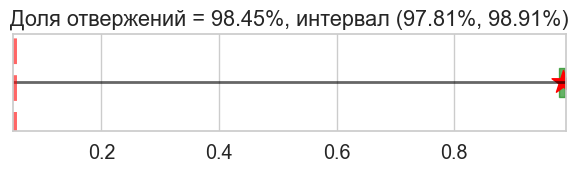

In [135]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите на гистограмму pvalue.

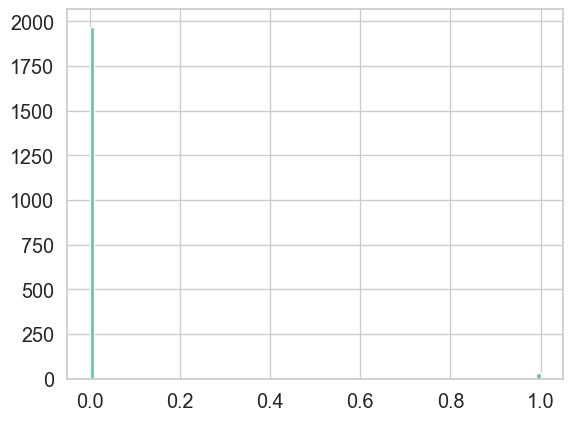

In [136]:
plt.hist(p_vals,bins = 100);

In [137]:
print(p_vals.shape, ' ', p_vals[p_vals < 0.01].shape)

(2000,)   (1969,)


Какие выводы о валидности выбранного критерия вы можете сделать?

**Ответ:**

Доля отвержений на АА тесте 98%)) Определенно что-то здесь не так

In [138]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(new_data, (2, sample_size), replace=False)

    sample2 = sample2 + 0.03
    sample2 += sps.norm.rvs(size=len(sample2), scale=0.1)

    pvals.append(absolute_ttest(sample1,sample2, alpha = alpha)[3])

pvals = np.array(pvals)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1253.17it/s]


In [129]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 1.0


**Вывод**

In [5]:
Image(url='https://www.meme-arsenal.com/memes/774f15dbc9f179945a40a39b472682a3.jpg')

---

### Задача 4
#### **Профиль физика**


Рассмотрим [данные о звездах](https://www.kaggle.com/datasets/fernandolima23/classification-in-asteroseismology?select=classification_in_asteroseismology.csv) из предыдущего домашнего задания:

Датасет содержит информацию о звездах, где `POP` - разделяет звёзды по классам. Нас будeт интересовать столбец `Dnu`.

Считайте данные.

In [174]:
df = pd.read_csv("classification_in_asteroseismology.csv")

In [175]:
df

,POP,Dnu,numax,epsilon
0,1,4.44780,43.06289,0.985
1,0,6.94399,74.07646,0.150
2,1,2.64571,21.57891,0.855
3,1,4.24168,32.13189,0.840
4,0,10.44719,120.37356,0.275
...,...,...,...,...
996,0,5.51582,49.99920,0.060
997,1,4.14823,32.09069,0.930
998,1,3.98294,30.90257,0.880
999,1,4.33893,45.62183,0.975


Получите таблицу `MDE`-мощности-размера выборки для параметра `Dnu` как в 3-м задании, но теперь проведя относительный ttest и написав его функцию.

In [29]:
def relative_ttest(x, y, alpha=0.05):
    '''
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    left_bound, right_bound -- границы дов. интервала
    pvalue
    '''

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = (x_mean - y_mean)/y_mean
    var = (x.var()/y_mean)**2 + (x_mean*y.var()/y_mean**2)**2
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2*sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q * std
    right_bound = stat + q * std

    return stat, left_bound, right_bound, pvalue

In [177]:
mde_grid = np.arange(0.01, 0.1, 0.01).reshape(-1, 1) # относительный MDE
beta_grid = np.arange(0.6, 1, 0.05)  # мощность
alpha = 0.05
var = df['Dnu'].var() * 2 / (df['Dnu'].mean()**2)  # относительная дисперсия

sample_sizes = get_sample_size(alpha,beta_grid, mde_grid, var)
pd.DataFrame(sample_sizes, columns=beta_grid.reshape(-1), index=mde_grid.reshape(-1))

,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
0.01,38848,44437,50734,57998,66658,77512,92331,116679
0.02,9712,11110,12684,14500,16665,19378,23083,29170
0.03,4317,4938,5638,6445,7407,8613,10259,12965
0.04,2428,2778,3171,3625,4167,4845,5771,7293
0.05,1554,1778,2030,2320,2667,3101,3694,4668
0.06,1080,1235,1410,1612,1852,2154,2565,3242
0.07,793,907,1036,1184,1361,1582,1885,2382
0.08,607,695,793,907,1042,1212,1443,1824
0.09,480,549,627,717,823,957,1140,1441


Какие значения `MDE`, достоверности и размера выборки стоит выбрать?

**Ответ:**
Так как размер выборки равен 1000, а replace = False, то берём 0.09, 0.6, 500 

Далее как в 3-й задаче по физике посмотрим на реальный уровень значимости, гистограмму p_value и реальный уровень значимости.

In [178]:
sample_size = 500
mde = 0.09
alpha = 0.6

In [179]:
p_vals = []

for i in tqdm(range(2000)):

    sample1, sample2 = np.random.choice(df['Dnu'], (2, sample_size), replace=False)

    p_val = relative_ttest(sample1, sample2, alpha = alpha)
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:00<00:00, 2227.99it/s]


Реальный уровень значимости: 0.53


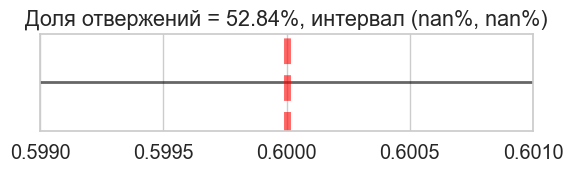

In [180]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')
left_alpha, right_alpha = proportion_confint((p_vals < alpha).sum(), len(p_vals), method='wilson')
draw_interval(real_alpha, left_alpha, right_alpha, alpha=alpha)

Посмотрите также на гистограмму p-value.

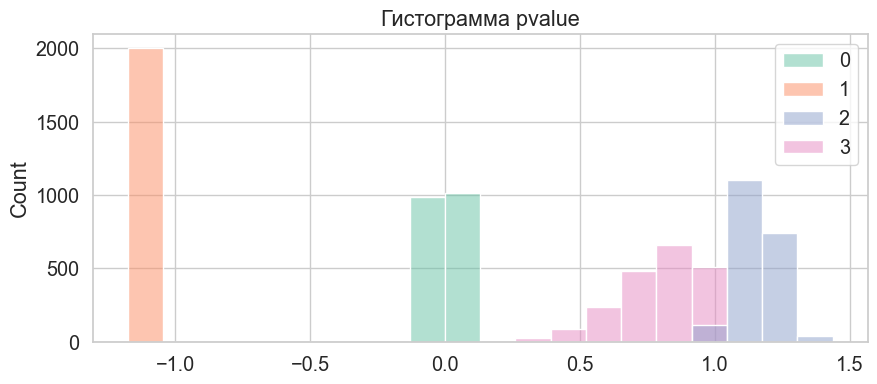

In [181]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 4))
plt.title('Гистограмма pvalue')
sns.histplot(p_vals)
plt.show()

Что можно сказать о валидности критерия?

**Ответ:**

Проверьте также мощность критерия на выбранном `MDE`.


In [182]:
pvals = []

for _ in tqdm(range(2000)):
    sample1, sample2 = np.random.choice(df['Dnu'], (2, sample_size), replace=False)

    sample2 = sample2 + 0.09
    sample2 += sps.norm.rvs(size=len(sample2), scale=0.1)

    pvals.append(relative_ttest(sample1, sample2, alpha = alpha))

pvals = np.array(pvals)

100%|████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:01<00:00, 1964.52it/s]


In [183]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.54


Теперь воспользуемся стратификацией. Будем разбивать на страты по параметру `POP` выборки.

Реализуйте функции для стратифицированного семплирования и стратифицированного относительного t-test. Заранее вспомните с семинара, какое семплирование какому тесту подходит. Не забудьте о возможности пост-стратификации. Какие методы подойдут вам, учитывая количество страт и размер выборки?

**Ответ:** У нас небольшой дисбаланс классов, а при нём нельзя пользоваться формулами дисперсии для стратифицированного среднего

In [30]:
def calculate_strata_weights(data):
    '''
    Вычисляет веса страт.

    :param data: исходные данные
    :return: веса страт
    '''

    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights


def weighted_mean(data, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data['sample'].mean()


def random_sampler(data, sample_size):
    '''
    Случайное семплирование двух групп одного размера из данных.

    :param data: исходные данные
    :param sample_size: размер группы
    :return: две группы данных
    '''

    choiced = data.sample(n=2 * sample_size)
    return choiced.iloc[:sample_size], choiced.iloc[sample_size:]

def stratified_sampler(data, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param sample_size: размер выборки
    :return: две выборки
    '''
    # Сгруппируйте данные по стратам с помощью метода groupby()
    groupped = data.groupby(by = 'strata')

    # Посчитайте веса страт (посчитайте количество элемеентов каждой страты и поделите на размер датасета)
    strata_weights = calculate_strata_weights(data)

    # Посчитайте размер выборок (умножьте размер сэмпла на веса страт и округлите)
    strata_sample_size = sample_size*strata_weights.round(0).astype(int)

    a_group, b_group = [], []

    # Генерируем выборки для каждой страты отдельно
    for i, strata in enumerate(groupped):

        # Сгенерирйте две выборки из strata[1] с размером strata_sample_size[i]
        a, b = strata[1].sample(n = strata_sample_size[i]), strata[1].sample(n = strata_sample_size[i])

        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)

def weighted_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    return (strata_vars * strata_weights).sum() / len(data)

def weighted_post_var(data, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.

    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''

    strata_vars = data.groupby(by='strata')['sample'].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition



def simple_var(data, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data['sample'].var() / len(data)

In [36]:
def stratified_ttest(x_data, y_data, strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.

    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''

    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var

    x_mean = mean_function(x_data, strata_weights)
    y_mean = mean_function(y_data, strata_weights)
    x_var  =  var_function(x_data, strata_weights)
    y_var  =  var_function(y_data, strata_weights)

    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)

    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))

    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std

    return stat, left_bound, right_bound, pvalue

Теперь проверим корректность применения стратификации в нашем случае.

Сначала создадим отдельный датасет для более удобной проверки. У него будет две колонки: `sample`, `strata`, которые соответствуют данным и разделением на страты у исходного датасета.

In [186]:
data = pd.DataFrame()
data['strata'] = df['POP']
data['sample'] = df['Dnu']
data = data[['strata', 'sample']]
data

,strata,sample
0,1,4.44780
1,0,6.94399
2,1,2.64571
3,1,4.24168
4,0,10.44719
...,...,...
996,0,5.51582
997,1,4.14823
998,1,3.98294
999,1,4.33893


Посмотрите на `boxplot` для двух подгрупп.

<AxesSubplot:xlabel='strata', ylabel='sample'>

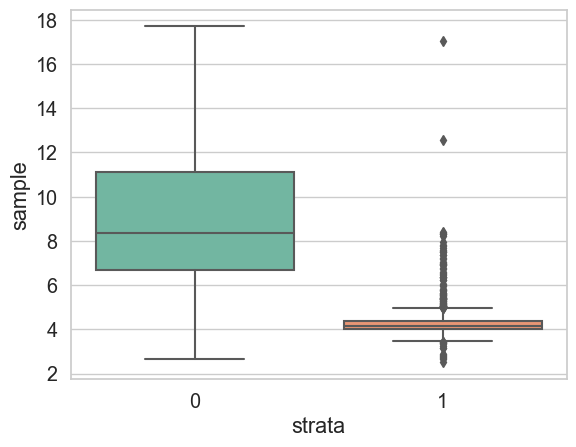

In [193]:
sns.boxplot(data = data, x='strata', y='sample')

In [194]:
data['strata'].sum()

713

Что вы можете сказать уже сейчас о том, повлияет ли стратификация на результаты теста?

**Ответ:**

Как я уже отметил, у нас есть дисбаланс классов, поэтому может плохо сработать

In [198]:
p_vals = []

for i in tqdm(range(2000)):

    control_sample, test_sample = stratified_sampler(data, (2, sample_size))
    strata_weights = calculate_strata_weights(data)
    p_val = stratified_ttest(control_sample, test_sample,strata_weights,method='random', alpha = alpha)[3]
    p_vals.append(p_val)

p_vals = np.array(p_vals)

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:22<00:00, 89.86it/s]


Посмотрите также на реальный уровень значимости и гистограмму p-value

In [199]:
real_alpha = (p_vals < alpha).mean()
print(f'Реальный уровень значимости: {real_alpha.round(2)}')

Реальный уровень значимости: 0.34


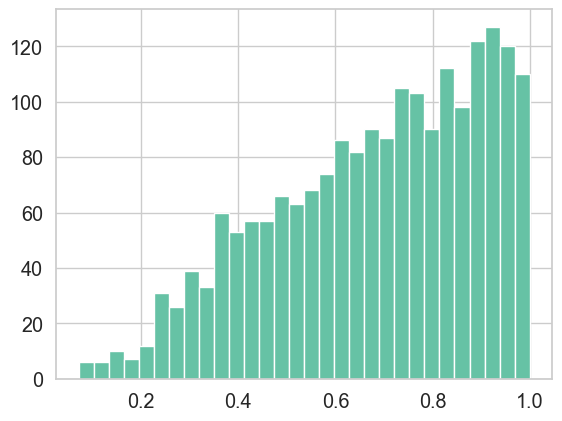

In [204]:
plt.hist(p_vals, bins = 30);

Корректны ли выбранные методы?

**Ответ:**

Такое себе, очень 0.34 >> 0.05

Посмотрите на мощность критерия. Улучшилась ли мощность по сравнению с обработкой без стратификации?

In [205]:
print(f'Реальная мощность критерия: {(pvals < alpha).mean().round(3)}')

Реальная мощность критерия: 0.54


**Ответ на вопрос о мощности:**

Не поменялась

**Вывод:**

Что-то я определённо неправильно делаю

---
### Задача 5

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

In [37]:
def AA_test(
    generate_data, sampler, total_size=20000,
    methods=['random', 'stratified', 'post_stratified'],
    n_iter=10000, sample_size=200, alpha=0.05, effect=0, show=False
):
    n_errors = np.zeros(len(methods))  # количество отвержений H_0

    # Проведение экспериментов
    for _ in tqdm(range(n_iter)):
        data = generate_data(total_size)
        strata_weights = calculate_strata_weights(data)
        x, y = sampler(data, sample_size)
        y['sample'] += effect

        for i in range(len(methods)):
            n_errors[i] += stratified_ttest(x, y, strata_weights, method=methods[i])[-1] < alpha
            
    if show:
        # Реальный уровень значимости
        real_alphas = np.zeros((len(methods), 3))
        for i in range(len(methods)):
            real_alphas[i] = calculate_real_alpha(n_errors[i], n_iter)
        draw_interval(
            real_alphas[:, 0], real_alphas[:, 1], real_alphas[:, 2],
            methods, alpha=alpha
        )

    return n_errors / n_iter

def generate_data(size, p=0.6, shift=5, scale_factor=1):
    data = pd.DataFrame()
    data['strata'] = sps.bernoulli(p=p).rvs(size=size)
    data['sample'] = sps.norm.rvs(size=size) * (1 + scale_factor * data['strata']) \
                        + shift*data['strata']
    return data

def weighted_sampler(data, sample_size, strata_weights='default'):

    groupped = data.groupby(by='strata')

    if strata_weights == 'default':
        # Веса страт определяем по данным
        strata_weights = groupped['sample'].count()
        strata_weights = strata_weights / strata_weights.sum()
    else:
        # Веса страт заданы
        strata_weights = np.array(strata_weights)

    # Размер выборок по стратам
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем отдельно из каждой страты
    for i, strata in enumerate(groupped):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)
def weighted_mean(data, weights):
    strata_means = data.groupby(by='strata')['sample'].mean()
    return (strata_means * weights).sum()


def simple_mean(data, weights):

    return data['sample'].mean()

# Напишите функцию стратифицированного семплирования
def stratified_sampler(data, sample_size):
    # Сгруппируйте данные по стратам с помощью метода groupby()
    groupped = data.groupby(by = 'strata')

    # Посчитайте веса страт (посчитайте количество элемеентов каждой страты и поделите на размер датасета)
    strata_weights = calculate_strata_weights(data)

    # Посчитайте размер выборок (умножьте размер сэмпла на веса страт и округлите)
    strata_sample_size = sample_size*strata_weights.round(0).astype(int)

    a_group, b_group = [], []

    # Генерируем выборки для каждой страты отдельно
    for i, strata in enumerate(groupped):

        # Сгенерирйте две выборки из strata[1] с размером strata_sample_size[i]
        a, b = strata[1].sample(n = strata_sample_size[i]), strata[1].sample(n = strata_sample_size[i])

        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def sample_mean_diff(sampler, mean_function, data, sample_size, n_iter):
    strata_weights = data.groupby(by='strata')['sample'].count()
    strata_weights = strata_weights / strata_weights.sum()

    mean_sample = np.zeros(n_iter)

    for i in tqdm(range(n_iter)):
        groups = sampler(data, sample_size)
        mean_sample[i] = mean_function(groups[0], strata_weights) - mean_function(groups[1], strata_weights)

    return mean_sample

In [40]:
errors = []
data = generate_data(2000)
weights = np.linspace(0.05, 0.5, 10)
for w in weights:
    errors.append(AA_test(generate_data,lambda data, 
                          sample_size: weighted_sampler(data, 1000, strata_weights=[w, 1-w]),n_iter=1000))

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:13<00:00, 74.66it/s]


In [58]:
errors = np.array(errors)
methods=np.array(['random', 'stratified', 'post_stratified'])

In [59]:
errors[:,2]

array([0.139, 0.077, 0.039, 0.043, 0.048, 0.054, 0.037, 0.048, 0.054,
       0.083])

Text(0, 0.5, 'Error')

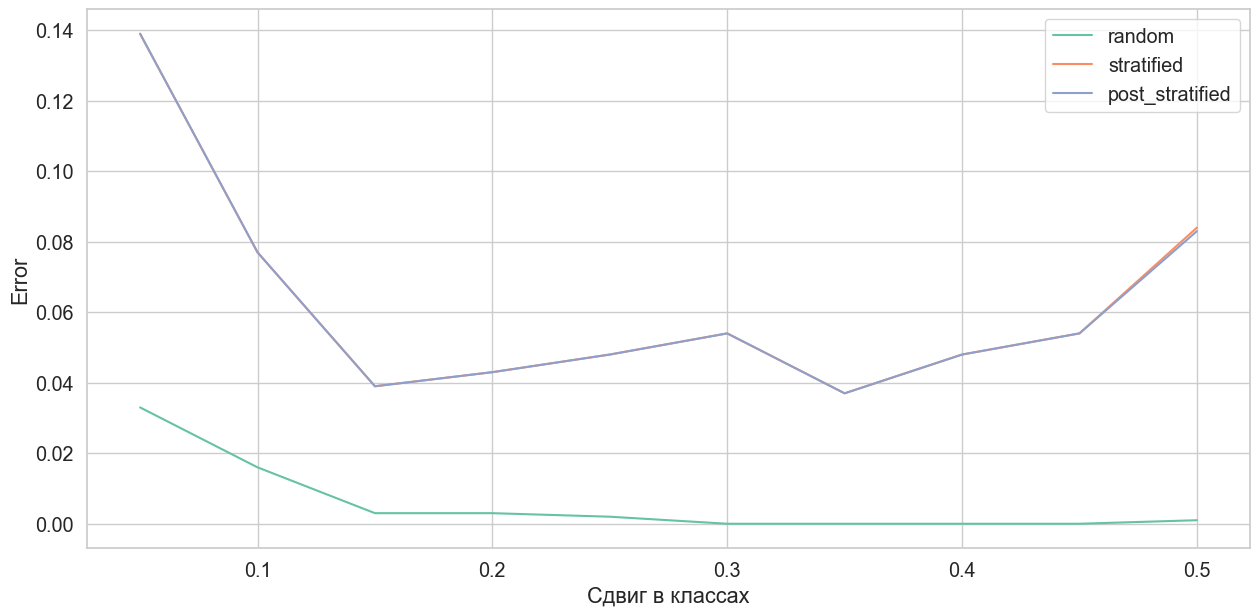

In [62]:
plt.figure(figsize=(15,7))
for i in range(3):
    plt.plot(np.linspace(0.05, 0.5, 10), errors[:,i], label = methods[i])
plt.legend()
plt.xlabel("Сдвиг в классах")
plt.ylabel("Error")

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Проблема в том, что мы не хотим ошибаться)

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

...

Реализуйте эту процедруру.

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.